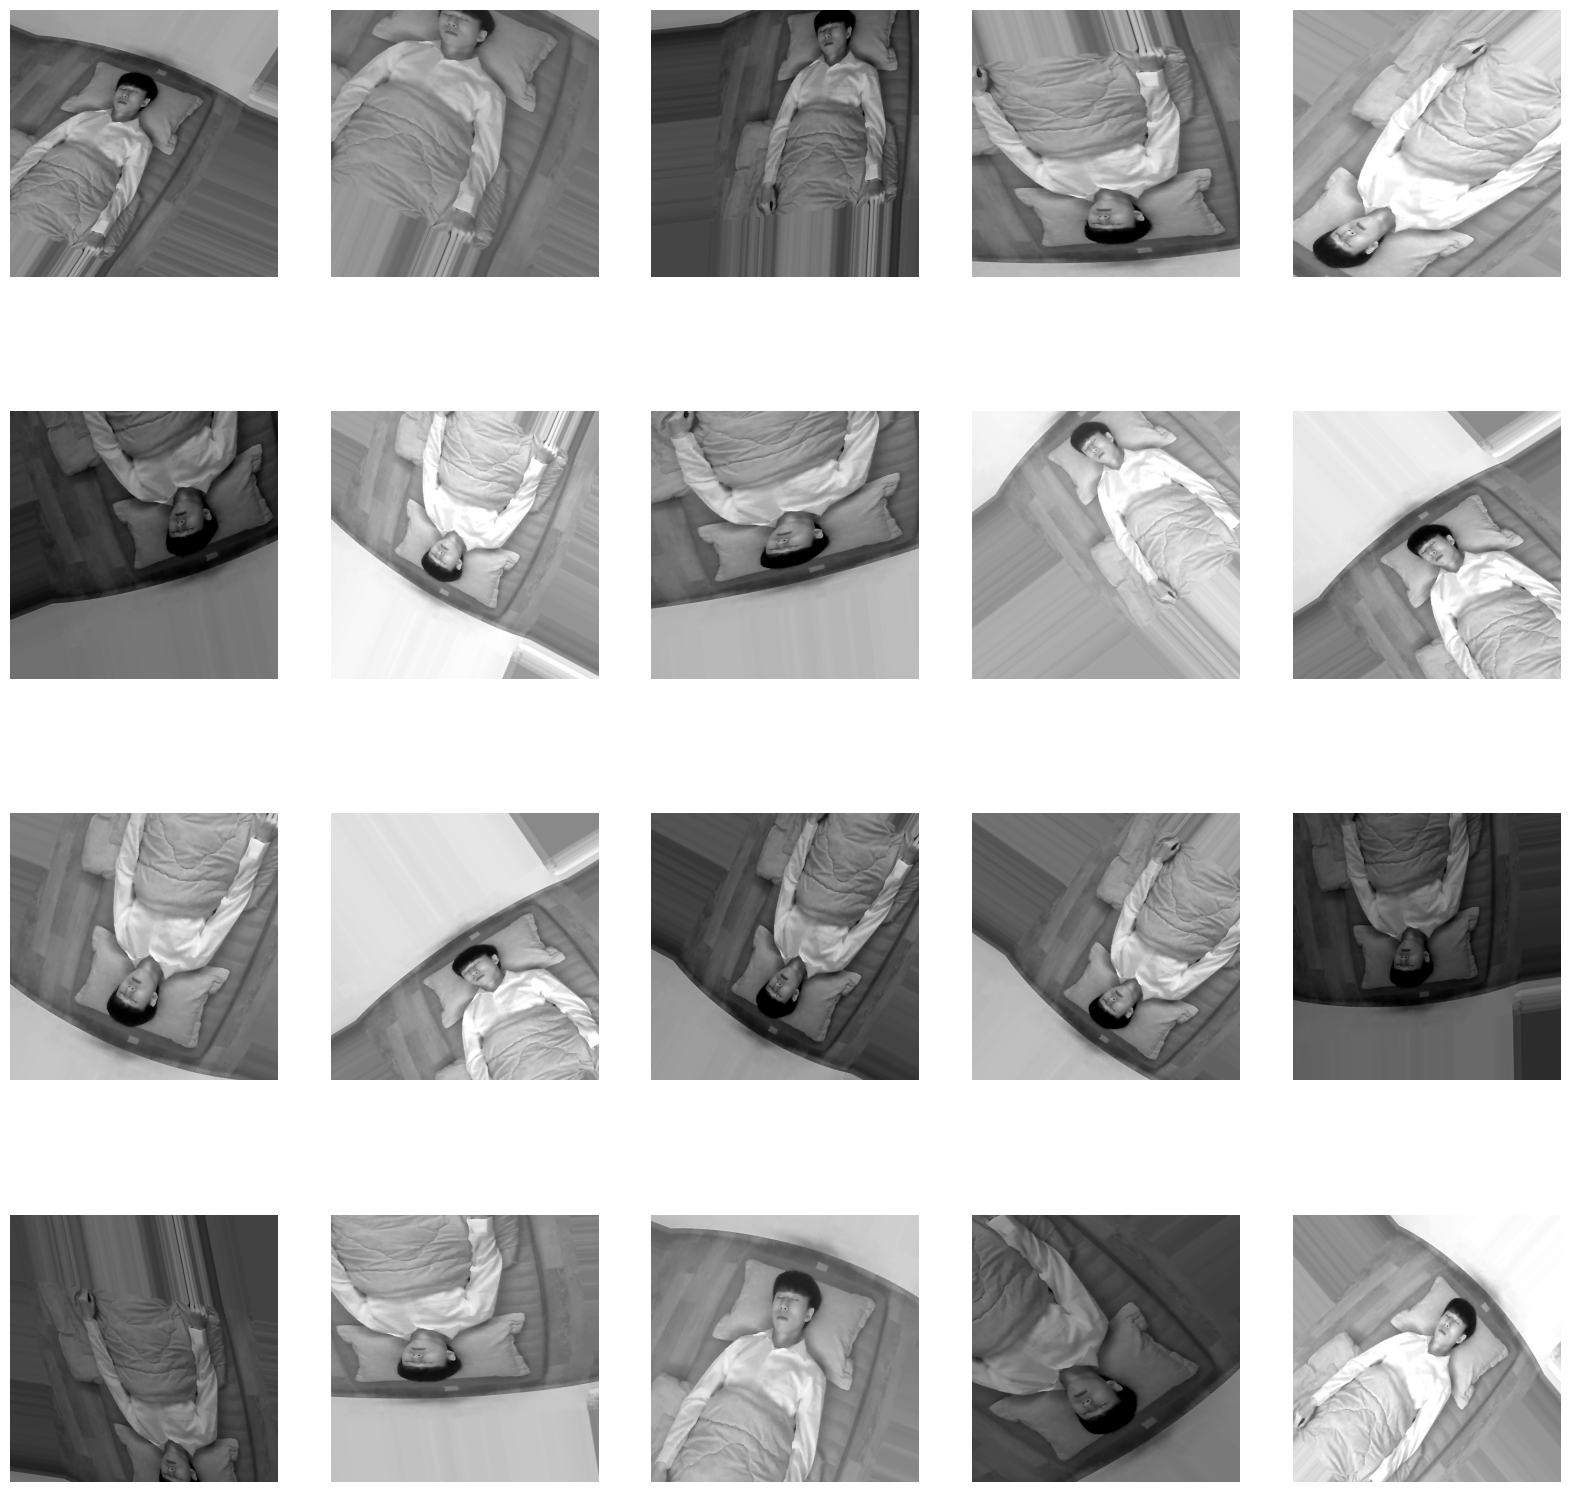

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# 이미지 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=40,
    vertical_flip=True,
    width_shift_range=0.3,
    height_shift_range=0.2,
    zoom_range=0.3,
    shear_range=20,
    channel_shift_range=50,
    brightness_range=(0.8,1.5),
    fill_mode='nearest')

# 이미지 파일 경로
image_path = '/content/drive/MyDrive/data_DE_10Class_1080/train/front/front_D101.jpg'

# 이미지 로드 및 배열로 변환
image = load_img(image_path)
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)

# 증강 이미지 생성 및 출력
augmented_images = datagen.flow(image_array, batch_size=1)

# 출력할 이미지 개수와 subplot 행, 열 설정
num_images = 20
subplot_rows = 4
subplot_cols = 5

plt.figure(figsize=(20, 20))
for i in range(num_images):
    plt.subplot(subplot_rows, subplot_cols, i+1)
    plt.imshow(augmented_images.next()[0].astype(np.uint8))
    plt.axis("off")

plt.show()

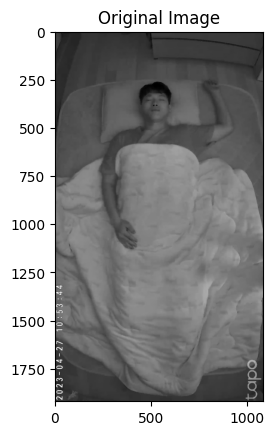

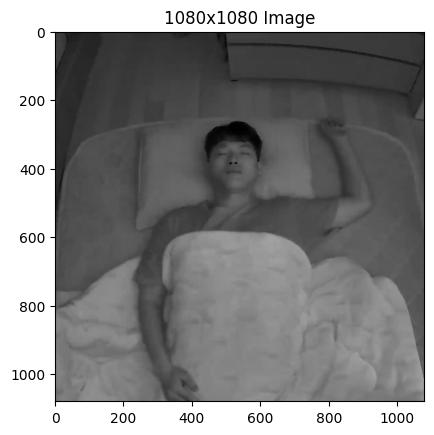

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def resize_and_show_image(image_path):
    img = Image.open(image_path)

    plt.imshow(img)
    plt.title('Original Image')
    plt.show()

    width, height = img.size
    left = 0
    top = 0
    right = width
    bottom = 1080

    img_1080 = img.crop((left, top, right, bottom))

    plt.imshow(img_1080)
    plt.title('1080x1080 Image')
    plt.show()

resize_and_show_image('/content/drive/MyDrive/data_ABC_10Class/test/front_left_raised/front_left_raised1499.jpg')

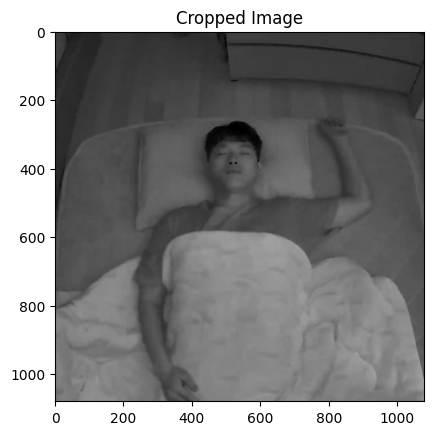

In [ ]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def crop_image(image):
    return tf.image.crop_to_bounding_box(image, 0, 0, 1080, 1080)

image_path = '/content/drive/MyDrive/data_ABC_10Class/test/front_left_raised/front_left_raised1499.jpg'
img = Image.open(image_path)

img_tensor = tf.convert_to_tensor(np.array(img), dtype=tf.float32)

cropped_img = crop_image(img_tensor)

plt.imshow(cropped_img.numpy().astype(int))
plt.title('Cropped Image')
plt.show()

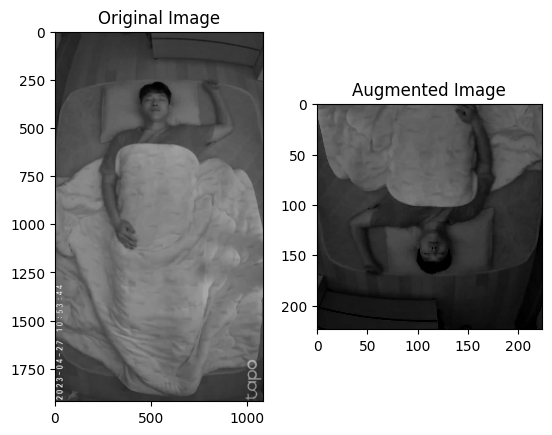

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.crop_to_bounding_box(image, 0, 0, 1080, 1080)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize
    # Data augmentation: slight rotation, translation, zoom, etc.
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)
    return image

# Replace the path below with your own image file path
image_path = '/content/drive/MyDrive/data_ABC_10Class/test/front_left_raised/front_left_raised1499.jpg'
augmented_image = load_and_preprocess_image(image_path)

# Plot the original image and the augmented image
fig, axes = plt.subplots(1, 2)
axes[0].imshow(tf.image.decode_image(tf.io.read_file(image_path)))
axes[0].set_title('Original Image')
axes[1].imshow(augmented_image)
axes[1].set_title('Augmented Image')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np

def crop_to_1080(image):
    img = tf.image.decode_jpeg(image, channels=3)
    height, width = img.shape[:2]

    if height < 1080 or width < 1080:
        img = tf.image.resize(img, [1080, 1080])  # 사이즈가 작은 이미지를 1080x1080으로 리사이즈 합니다.
        return img

    start_height = (height - 1080) // 2
    start_width = (width - 1080) // 2
    cropped_image = tf.image.crop_to_bounding_box(img, start_height, start_width, 1080, 1080)

    return cropped_image

# 이미지 데이터 전처리 및 증강을 위한 ImageDataGenerator를 정의합니다.
datagen = ImageDataGenerator(
    preprocessing_function=crop_to_1080,
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=10,
    channel_shift_range=50,
    brightness_range=(0.8,1.8),
    fill_mode='nearest')

# 이미지를 로드합니다.
img = load_img('/content/drive/MyDrive/data_ABC_10Class/test/front_left_raised/front_left_raised1499.jpg')

# PIL 이미지를 NumPy 배열로 변환
img_array = np.array(img, dtype='float32')

# 이미지를 4D 텐서로 변형합니다. (ImageDataGenerator가 4D 텐서를 입력으로 받기 때문입니다)
img_array = img_array.reshape((1,) + img_array.shape)

# datagen.flow()는 무한 반복되는 이터레이터를 반환하므로, for문 안에서 break를 사용하여 원하는 수의 이미지를 생성합니다.
i = 0
for batch in datagen.flow(img_array, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 4 == 0:  # 4개의 이미지를 생성하고 종료
        break

plt.show()


ValueError: ignored